In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housesalesprediction/kc_house_data.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load Dataset

In [3]:
house_df = pd.read_csv('/kaggle/input/housesalesprediction/kc_house_data.csv')

# EDA and Data Cleansing

## Data Summary

In [4]:
house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
house_df.shape

(21613, 21)

In [6]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
house_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Total Unique Value for Each Column

In [8]:
house_df.nunique()

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

## Data Correlation

In [9]:
house_df.corr()['price'].sort_values()

zipcode         -0.053203
id              -0.016762
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

<AxesSubplot:>

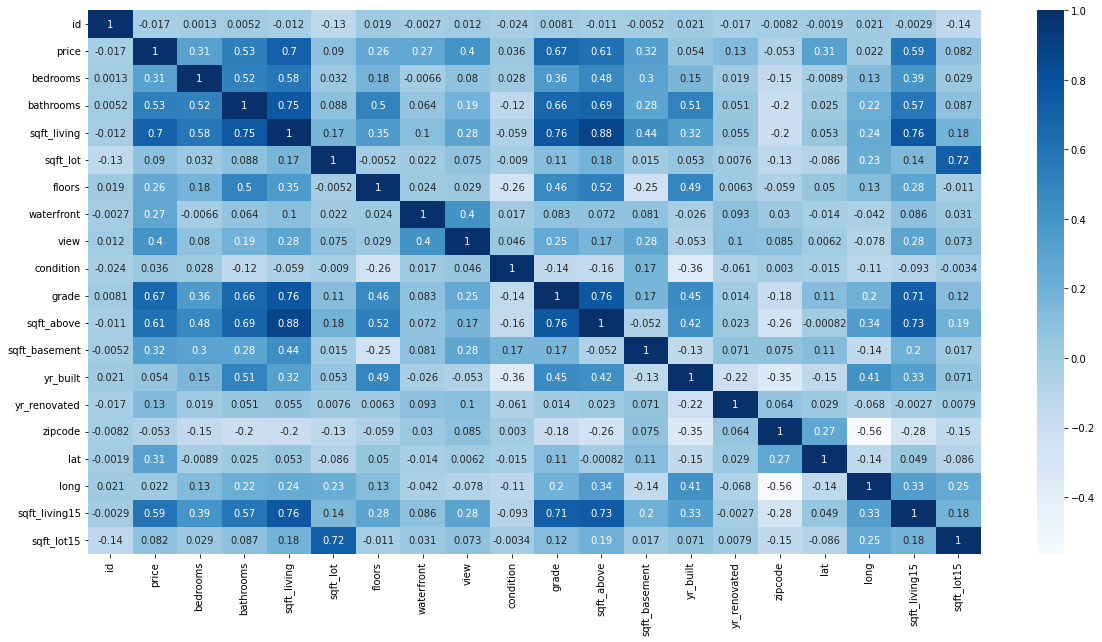

In [10]:
fig, ax = plt.subplots(figsize=(20,10))
corr = house_df.corr()
sns.heatmap(corr, cmap="Blues", annot=True, ax=ax)

## Parse Date

In [11]:
house_df['date']= pd.to_datetime(house_df['date'])
house_df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: date, Length: 21613, dtype: datetime64[ns]

## Unique House ID

### Check Duplicated House ID

In [12]:
house_df[house_df.duplicated(['id'], keep=False)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,2014-07-25,430000.0,3,1.50,1580,5000,1.0,0,0,...,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500
94,6021501535,2014-12-23,700000.0,3,1.50,1580,5000,1.0,0,0,...,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500
313,4139480200,2014-06-18,1384000.0,4,3.25,4290,12103,1.0,0,3,...,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244
314,4139480200,2014-12-09,1400000.0,4,3.25,4290,12103,1.0,0,3,...,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244
324,7520000520,2014-09-05,232000.0,2,1.00,1240,12092,1.0,0,0,...,6,960,280,1922,1984,98146,47.4957,-122.352,1820,7460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20670,8564860270,2015-03-30,502000.0,4,2.50,2680,5539,2.0,0,0,...,8,2680,0,2013,0,98045,47.4759,-121.734,2680,5992
20779,6300000226,2014-06-26,240000.0,4,1.00,1200,2171,1.5,0,0,...,7,1200,0,1933,0,98133,47.7076,-122.342,1130,1598
20780,6300000226,2015-05-04,380000.0,4,1.00,1200,2171,1.5,0,0,...,7,1200,0,1933,0,98133,47.7076,-122.342,1130,1598
21580,7853420110,2014-10-03,594866.0,3,3.00,2780,6000,2.0,0,0,...,9,2780,0,2013,0,98065,47.5184,-121.886,2850,6000


### Get Latest Data For Duplicated House ID

In [13]:
house_df.sort_values('date').drop_duplicates(subset=['id'], keep='last')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
16768,5561000190,2014-05-02,437500.0,3,2.25,1970,35100,2.0,0,0,...,9,1970,0,1977,0,98027,47.4635,-121.991,2340,35100
9596,472000620,2014-05-02,790000.0,3,2.50,2600,4750,1.0,0,0,...,9,1700,900,1951,0,98117,47.6833,-122.400,2380,4750
9587,1024069009,2014-05-02,675000.0,5,2.50,2820,67518,2.0,0,0,...,8,2820,0,1979,0,98029,47.5794,-122.025,2820,48351
20602,7853361370,2014-05-02,555000.0,4,2.50,3310,6500,2.0,0,0,...,8,3310,0,2012,0,98065,47.5150,-121.870,2380,5000
11577,5056500260,2014-05-02,440000.0,4,2.25,2160,8119,1.0,0,0,...,8,1080,1080,1966,0,98006,47.5443,-122.177,1850,9000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7898,1422700040,2015-05-14,183000.0,3,1.00,1170,7320,1.0,0,0,...,7,1170,0,1962,0,98188,47.4685,-122.282,2040,7320
928,8730000270,2015-05-14,359000.0,2,2.75,1370,1140,2.0,0,0,...,8,1080,290,2009,0,98133,47.7052,-122.343,1370,1090
5637,7923600250,2015-05-15,450000.0,5,2.00,1870,7344,1.5,0,0,...,7,1870,0,1960,0,98007,47.5951,-122.144,1870,7650
13053,5101400871,2015-05-24,445500.0,2,1.75,1390,6670,1.0,0,0,...,6,720,670,1941,0,98115,47.6914,-122.308,920,6380


## House Age

In [14]:
house_df['age'] = house_df['date'].dt.year - house_df['yr_built']

In [15]:
house_df['age'].value_counts()

 9      473
 8      443
 11     433
 0      430
 10     428
       ... 
 113     28
 115     26
 81      23
 80      21
-1       12
Name: age, Length: 117, dtype: int64

There is a house with -1 age (probably house sold before it finished building), see how many are there

In [16]:
house_df[house_df['age'] < 0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
1763,1832100030,2014-06-25,597326.0,4,4.00,3570,8250,2.0,0,0,...,2860,710,2015,0,98040,47.5784,-122.226,2230,10000,-1
2687,3076500830,2014-10-29,385195.0,1,1.00,710,6000,1.5,0,0,...,710,0,2015,0,98144,47.5756,-122.316,1440,4800,-1
7526,9520900210,2014-12-31,614285.0,5,2.75,2730,6401,2.0,0,0,...,2730,0,2015,0,98072,47.7685,-122.160,2520,6126,-1
8039,1250200495,2014-06-24,455000.0,2,1.50,1200,1259,2.0,0,0,...,1000,200,2015,0,98144,47.6001,-122.298,1320,1852,-1
14489,2770601530,2014-08-26,500000.0,2,2.25,1570,1269,2.0,0,0,...,1280,290,2015,0,98199,47.6514,-122.385,1570,6000,-1
17098,9126100346,2014-06-17,350000.0,3,2.00,1380,3600,3.0,0,0,...,1380,0,2015,0,98122,47.6074,-122.305,1480,3600,-1
19805,9126100765,2014-08-01,455000.0,3,1.75,1320,1014,3.0,0,0,...,1320,0,2015,0,98122,47.6047,-122.305,1380,1495,-1
20770,9310300160,2014-08-28,357000.0,5,2.50,2990,9240,2.0,0,0,...,2990,0,2015,0,98133,47.7384,-122.348,1970,18110,-1
20852,1257201420,2014-07-09,595000.0,4,3.25,3730,4560,2.0,0,0,...,2760,970,2015,0,98103,47.6725,-122.330,1800,4560,-1
20963,6058600220,2014-07-31,230000.0,3,1.50,1040,1264,2.0,0,0,...,900,140,2015,0,98144,47.5951,-122.301,1350,3000,-1


There are only a few data with -1 age, consider to drop it instead

In [17]:
house_df = house_df.drop(house_df[house_df['age'] < 0].index).reset_index(drop=True)

Because we already have the age column, we can drop yr_built

In [18]:
house_df = house_df.drop(['yr_built'], axis=1).reset_index(drop=True)
house_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,0,98178,47.5112,-122.257,1340,5650,59
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1991,98125,47.7210,-122.319,1690,7639,63
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,0,98028,47.7379,-122.233,2720,8062,82
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,0,98136,47.5208,-122.393,1360,5000,49
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,0,98074,47.6168,-122.045,1800,7503,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21596,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,0,98103,47.6993,-122.346,1530,1509,5
21597,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,0,98146,47.5107,-122.362,1830,7200,1
21598,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,0,98144,47.5944,-122.299,1020,2007,5
21599,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,0,98027,47.5345,-122.069,1410,1287,11


## Year After Last Renovation

In [19]:
house_df['yr_renovated'].value_counts()

0       20687
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

Most of the data has 0 value for its renovation year, this could be interpreted as a missing value, consider dropping this column

In [20]:
house_df[['yr_renovated', 'price']].corr()

,yr_renovated,price
yr_renovated,1.000000,0.126416
price,0.126416,1.000000


This column has low correlation with price, we can safely drop this column <br>
I will also drop the date column as it is no longer needed

In [21]:
house_df = house_df.drop(['yr_renovated', 'date'], axis=1)

## Waterfront and View

<AxesSubplot:xlabel='waterfront', ylabel='price'>

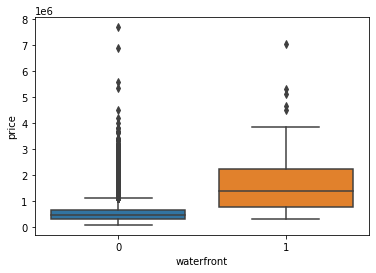

In [22]:
sns.boxplot(x='waterfront', y='price', data=house_df)

House with a waterfront has an average higher price and less outliers compared to house without a waterfront

<AxesSubplot:xlabel='view', ylabel='price'>

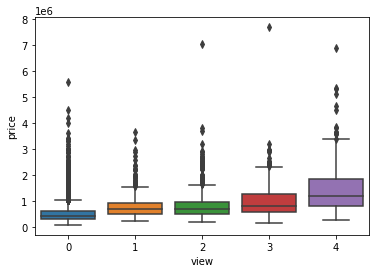

In [23]:
sns.boxplot(x='view', y='price', data=house_df)

House with a higher view score has a higher average price, except for the view score 2 (almost no difference with view score 1) <br>
I consider this column to be fully subjective compared to other columns (waterfront, condition, and grade) and choose to drop it

In [24]:
house_df = house_df.drop(['view'], axis=1)

## Condition and Grade

House condition can actually be measured by some factors

<AxesSubplot:xlabel='condition', ylabel='price'>

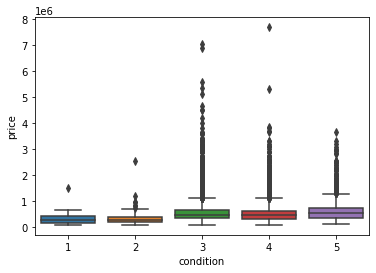

In [25]:
sns.boxplot(x='condition', y='price', data=house_df)

House with better condition translate to a higher price

House grade is measured by King County grading system

<AxesSubplot:xlabel='grade', ylabel='price'>

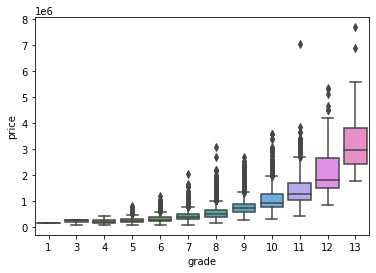

In [26]:
sns.boxplot(x='grade', y='price', data=house_df)

House with better grade translate to a higher price

## Number of Bedrooms

In [27]:
house_df['bedrooms'].value_counts()

3     9821
4     6880
2     2757
5     1598
6      272
1      198
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

There are a few data with unusual amount of bedrooms (0 and > 9) <br>
We should check for each data

In [28]:
house_df[house_df['bedrooms'] == 0]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,age
875,6306400140,1095000.0,0,0.00,3064,4764,3.5,0,3,7,3064,0,98102,47.6362,-122.322,2360,4000,24
3117,3918400017,380000.0,0,0.00,1470,979,3.0,0,3,8,1470,0,98133,47.7145,-122.356,1470,1399,9
3465,1453602309,288000.0,0,1.50,1430,1650,3.0,0,3,7,1430,0,98125,47.7222,-122.290,1430,1650,15
4866,6896300380,228000.0,0,1.00,390,5900,1.0,0,2,4,390,0,98118,47.5260,-122.261,2170,6000,61
6992,2954400190,1295650.0,0,0.00,4810,28008,2.0,0,3,12,4810,0,98053,47.6642,-122.069,4740,35061,24
8473,2569500210,339950.0,0,2.50,2290,8319,2.0,0,3,8,2290,0,98042,47.3473,-122.151,2500,8751,29
8480,2310060040,240000.0,0,2.50,1810,5669,2.0,0,3,7,1810,0,98038,47.3493,-122.053,1810,5685,11
9769,3374500520,355000.0,0,0.00,2460,8049,2.0,0,3,8,2460,0,98031,47.4095,-122.168,2520,8050,25
9850,7849202190,235000.0,0,0.00,1470,4800,2.0,0,3,7,1470,0,98065,47.5265,-121.828,1060,7200,18
12649,7849202299,320000.0,0,2.50,1490,7111,2.0,0,3,7,1490,0,98065,47.5261,-121.826,1500,4675,16


A house could have 0 bedrooms (house with one open area like a studio apartment), but consider to drop 0 bathrooms house in the next step (who wants to live in a house with no bathroom?)

In [29]:
house_df[house_df['bedrooms'] > 9]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,age
8753,1773100755,520000.0,11,3.00,3000,4960,2.0,0,3,7,2400,600,98106,47.5560,-122.363,1420,4960,96
13310,627300145,1148000.0,10,5.25,4590,10920,1.0,0,3,9,2500,2090,98004,47.5861,-122.113,2730,10400,6
15156,5566100170,650000.0,10,2.00,3610,11914,2.0,0,4,7,3010,600,98006,47.5705,-122.175,2040,11914,56
15865,2402100895,640000.0,33,1.75,1620,6000,1.0,0,5,7,1040,580,98103,47.6878,-122.331,1330,4700,67
19248,8812401450,660000.0,10,3.00,2920,3745,2.0,0,4,7,1860,1060,98105,47.6635,-122.320,1810,3745,101


Houses with more than 9 bedrooms look normal except for the 33 bedrooms house, drop this

In [30]:
house_df = house_df.drop(house_df[house_df['bedrooms'] == 33].index).reset_index(drop=True)
house_df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,age
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,0,98178,47.5112,-122.257,1340,5650,59
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,400,98125,47.7210,-122.319,1690,7639,63
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,3,6,770,0,98028,47.7379,-122.233,2720,8062,82
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,910,98136,47.5208,-122.393,1360,5000,49
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,0,98074,47.6168,-122.045,1800,7503,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21595,263000018,360000.0,3,2.50,1530,1131,3.0,0,3,8,1530,0,98103,47.6993,-122.346,1530,1509,5
21596,6600060120,400000.0,4,2.50,2310,5813,2.0,0,3,8,2310,0,98146,47.5107,-122.362,1830,7200,1
21597,1523300141,402101.0,2,0.75,1020,1350,2.0,0,3,7,1020,0,98144,47.5944,-122.299,1020,2007,5
21598,291310100,400000.0,3,2.50,1600,2388,2.0,0,3,8,1600,0,98027,47.5345,-122.069,1410,1287,11


## Number of Batrooms

In [31]:
house_df['bathrooms'].value_counts()

2.50    5379
1.00    3851
1.75    3046
2.25    2046
2.00    1929
1.50    1444
2.75    1184
3.00     752
3.50     730
3.25     588
3.75     155
4.00     135
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [32]:
house_df = house_df.drop(house_df[house_df['bathrooms'] == 0].index).reset_index(drop=True)
house_df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,age
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,0,98178,47.5112,-122.257,1340,5650,59
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,400,98125,47.7210,-122.319,1690,7639,63
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,3,6,770,0,98028,47.7379,-122.233,2720,8062,82
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,910,98136,47.5208,-122.393,1360,5000,49
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,0,98074,47.6168,-122.045,1800,7503,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21585,263000018,360000.0,3,2.50,1530,1131,3.0,0,3,8,1530,0,98103,47.6993,-122.346,1530,1509,5
21586,6600060120,400000.0,4,2.50,2310,5813,2.0,0,3,8,2310,0,98146,47.5107,-122.362,1830,7200,1
21587,1523300141,402101.0,2,0.75,1020,1350,2.0,0,3,7,1020,0,98144,47.5944,-122.299,1020,2007,5
21588,291310100,400000.0,3,2.50,1600,2388,2.0,0,3,8,1600,0,98027,47.5345,-122.069,1410,1287,11


## Location

Drop info about location as I am not planning to use this info for the prediction (needs to be one hot encoded also)

In [33]:
house_df = house_df.drop(['lat', 'long', 'zipcode'], axis=1).reset_index(drop=True)
house_df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,age
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,0,1340,5650,59
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,400,1690,7639,63
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,3,6,770,0,2720,8062,82
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,910,1360,5000,49
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,0,1800,7503,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21585,263000018,360000.0,3,2.50,1530,1131,3.0,0,3,8,1530,0,1530,1509,5
21586,6600060120,400000.0,4,2.50,2310,5813,2.0,0,3,8,2310,0,1830,7200,1
21587,1523300141,402101.0,2,0.75,1020,1350,2.0,0,3,7,1020,0,1020,2007,5
21588,291310100,400000.0,3,2.50,1600,2388,2.0,0,3,8,1600,0,1410,1287,11


## Sqft 15 Data

A source that I read says that sqft_living15 and sqft_lot15 is sqft data on 2015, we can drop the sqft_living and sqft_lot columns and use the 2015 data

In [34]:
# house_df = house_df.drop(['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement'], axis=1).reset_index(drop=True)
# house_df = house_df.drop(['sqft_living', 'sqft_lot'], axis=1).reset_index(drop=True)
house_df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,age
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,0,1340,5650,59
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,400,1690,7639,63
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,3,6,770,0,2720,8062,82
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,910,1360,5000,49
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,0,1800,7503,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21585,263000018,360000.0,3,2.50,1530,1131,3.0,0,3,8,1530,0,1530,1509,5
21586,6600060120,400000.0,4,2.50,2310,5813,2.0,0,3,8,2310,0,1830,7200,1
21587,1523300141,402101.0,2,0.75,1020,1350,2.0,0,3,7,1020,0,1020,2007,5
21588,291310100,400000.0,3,2.50,1600,2388,2.0,0,3,8,1600,0,1410,1287,11


# ML Model Development

In [35]:
X = house_df.drop(['price', 'id'], axis=1)
y = house_df['price']

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

## Linear Regression

In [37]:
pipe = Pipeline([('scaler', StandardScaler()), ('linear', LinearRegression())])

In [38]:
pipe.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()), ('linear', LinearRegression())])

In [39]:
pipe.score(X, y)

0.6494546233809266

In [40]:
cross_val_scores = cross_val_score(
    pipe, 
    X, 
    y, 
    scoring='neg_mean_squared_error', 
    cv=10
)

# Print the 10-fold RMSE
print("10-fold RMSE: ", np.mean(np.sqrt(np.abs(cross_val_scores))))

10-fold RMSE:  218438.1470660415


## XGBoost

In [41]:
import xgboost as xgb

In [42]:
xgb_pipe = Pipeline([('scaler', StandardScaler()), ('xgb', xgb.XGBRegressor())])

In [43]:
xgb_pipe.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('xgb',
                 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              gamma=0, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.300000012, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=6, max_leaves=0, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=100, n_jobs=0, num_parallel_tree=1,
                              predictor='auto', random_state=0, reg_alpha=0,
                              

In [44]:
xgb_pipe.score(X, y)

0.9098824392305079

In [45]:
cross_val_scores = cross_val_score(
    xgb_pipe, 
    X, 
    y, 
    scoring='neg_mean_squared_error', 
    cv=10
)

# Print the 10-fold RMSE
print("10-fold RMSE: ", np.mean(np.sqrt(np.abs(cross_val_scores))))

10-fold RMSE:  184423.94972466552


# Export Result to Pickle

In [46]:
import joblib

In [47]:
filename = 'xgb_pipe.sav'
joblib.dump(xgb_pipe, filename)

['xgb_pipe.sav']

In [48]:
!cd /kaggle/working
!tar -czvf xgb_pipe.zip -C . .

./
./xgb_pipe.sav
./__notebook__.ipynb
./xgb_pipe.zip
tar: ./xgb_pipe.zip: file changed as we read it
tar: .: file changed as we read it
